In [2]:
# REST representation state transfer
# twitter rest api allows the user to read and write data
import tweepy
import json

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open('tweets.txt', 'w')
    
    def on_status(self, status):
        tweet = status._json
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()
        

In [4]:
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"


In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [7]:
# create streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)
# thist line filters twitter streams to capture data by keywords:
stream.filter(track=['apples', 'oranges'])

In [16]:
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [17]:
import json
tweets_data_path = 'data/tweets3.txt'

tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


In [18]:
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())


                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


In [24]:
candidates = ['clinton', 'trump', 'sanders', 'cruz']
dict_candidates = {}
for candidate in candidates:
    dict_candidates[candidate] = 0
    
print(dict_candidates)

{'clinton': 0, 'trump': 0, 'sanders': 0, 'cruz': 0}


In [25]:
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


RT @bpolitics: .@krollbondrating's Christopher Whalen says Clinton is the weakest Dem candidate in 50 years https://t.co/pLk7rvoRSn https:/…
RT @HeidiAlpine: @dmartosko Cruz video found.....racing from the scene.... #cruzsexscandal https://t.co/zuAPZfQDk3
Njihuni me Zonjën Trump !!! | Ekskluzive https://t.co/4KmsQi47VD
Your an idiot she shouldn't have tried to grab trump after the fact she's an idiot https://t.co/lpASyeNVpG
RT @AlanLohner: The anti-American D.C. elites despise Trump for his America-first foreign policy. Trump threatens their gravy train. https:…
RT @BIackPplTweets: Young Donald trump meets his neighbor  https://t.co/RFlu17Z1eE
RT @trumpresearch: @WaitingInBagdad @thehill Trump supporters have selective amnisia.
RT @HouseCracka: 29,000+ PEOPLE WATCHING TRUMP LIVE ON ONE STREAM!!!

https://t.co/7QCFz9ehNe
RT @urfavandtrump: RT for Brendon Urie
Fav for Donald Trump https://t.co/PZ5vS94lOg
RT @trapgrampa: This is how I see #Trump every time he speaks. https://t.co/fYSiHNS0

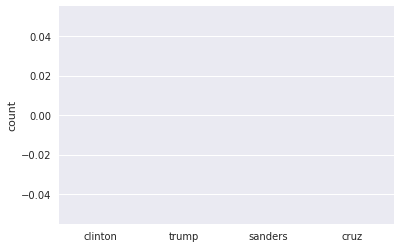

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()
